In [1]:
# Import Important Libraries

import pandas as pd
import tensorflow as tf 

In [27]:
#Import the dataframes

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
 

In [28]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [29]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [30]:
train_df.shape

(7613, 5)

In [31]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [33]:
#Let's clean the Nan rows 

train_df['keyword'] = train_df['keyword'].fillna('')
train_df['location'] = train_df['location'].fillna('')

In [34]:
#The columns keyword could add a complementary information, so lets combine the two columns

cols = ['text','keyword']

train_df['combined_text'] = train_df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [35]:
train_df.head()

,id,keyword,location,text,target,combined_text
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,,,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...


In [36]:
train_df.iloc[0,5]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all '

In [37]:
# Now we can drop the useless columns 

#train_df=train_df.drop(['id','keyword','location','text'], axis = 1)
train_df=train_df.drop(['id','keyword','location','combined_text'], axis = 1)
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [38]:
#Now we can make some NLP transformations

#train_df["tweet_format_clean"]=train_df["combined_text"].str.replace(r"[^A-Za-z]+", " ", regex=True) 
train_df["tweet_format_clean"]=train_df["text"].str.replace(r"[^A-Za-z]+", " ", regex=True) 
train_df["tweet_format_clean"]=train_df["tweet_format_clean"].replace('\s+', ' ', regex=True)
train_df["tweet_format_clean"] = train_df["tweet_format_clean"].fillna('').apply(lambda x: x.lower())

train_df.head()

,text,target,tweet_format_clean
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [39]:
#Let's tokenize the tweets 

import en_core_web_sm
nlp = en_core_web_sm.load()

tokenized_doc = train_df['tweet_format_clean'].apply(lambda x: nlp(x))

In [40]:
#Let's remove the stop words and the words with less of two letters

from spacy.lang.en.stop_words import STOP_WORDS
words_to_remove_list=["http","https","co","like"]
all_stopwords=STOP_WORDS
all_stopwords.update(words_to_remove_list)

# remove stop-words and lemmalize 
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in all_stopwords and (len(token.text) > 3)])


In [41]:
tokenized_doc

0              [deed, reason, earthquake, allah, forgive]
1               [forest, fire, near, ronge, sask, canada]
2       [resident, ask, shelter, place, notify, office...
3       [people, receive, wildfire, evacuation, order,...
4       [send, photo, ruby, alaska, smoke, wildfire, p...
                              ...                        
7608    [giant, crane, hold, bridge, collapse, nearby,...
7609    [aria, ahrary, thetawniest, control, wild, fir...
7610                            [volcano, hawaii, zdtoyd]
7611    [police, investigate, bike, collide, little, p...
7612    [late, home, raze, northern, california, wildf...
Name: tweet_format_clean, Length: 7613, dtype: object

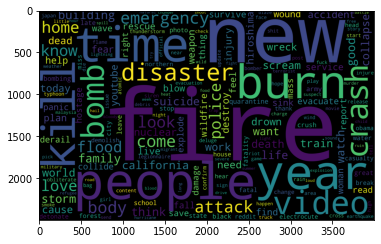

In [42]:
# Create a wordcloud

g=tokenized_doc.tolist()

flat_list = []
for sublist in g:
    for item in sublist:
        flat_list.append(item)

flat_list=' '.join(flat_list)

# Import wordcloud and matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instanciate wordcloud
wd = WordCloud(stopwords=STOP_WORDS,collocations=False, width=4000, height=2500)

# Generate wordcloud 
cloud = wd.generate(flat_list)

# Show plot
plt.imshow(cloud)
plt.show()

In [43]:
#Let's check more in detail the vocabulary

from collections import Counter
results = Counter()
tokenized_doc.apply(results.update)
print(results)


Counter({'fire': 363, 'news': 213, 'people': 201, 'go': 182, 'burn': 177, 'year': 177, 'kill': 177, 'video': 175, 'bomb': 167, 'crash': 166, 'time': 165, 'disaster': 162, 'emergency': 159, 'come': 159, 'body': 155, 'attack': 155, 'look': 145, 'home': 144, 'police': 143, 'know': 138, 'love': 135, 'building': 132, 'good': 132, 'family': 132, 'flood': 129, 'think': 129, 'storm': 129, 'life': 122, 'california': 121, 'suicide': 120, 'watch': 119, 'train': 118, 'want': 117, 'death': 117, 'world': 117, 'say': 116, 'collapse': 116, 'work': 112, 'scream': 111, 'cause': 106, 'nuclear': 104, 'today': 102, 'need': 101, 'drown': 101, 'dead': 99, 'wreck': 99, 'accident': 98, 'youtube': 98, 'destroy': 95, 'hiroshima': 95, 'plan': 91, 'live': 90, 'help': 90, 'fear': 90, 'weapon': 90, 'get': 87, 'injury': 87, 'find': 84, 'feel': 83, 'blow': 83, 'wound': 83, 'rescue': 83, 'wildfire': 82, 'survive': 81, 'sink': 81, 'fall': 80, 'report': 79, 'evacuate': 78, 'explode': 77, 'wave': 75, 'panic': 75, 'collide

In [44]:
#Let's check the number of words in the vocabulary

s=0
for i in results.elements():
  s=s+1

print(s)

60913


In [45]:
train_df["tweet_format_token"]=tokenized_doc

In [46]:
train_df

,text,target,tweet_format_clean,tweet_format_token
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[deed, reason, earthquake, allah, forgive]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[resident, ask, shelter, place, notify, office..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[people, receive, wildfire, evacuation, order,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[send, photo, ruby, alaska, smoke, wildfire, p..."
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[giant, crane, hold, bridge, collapse, nearby,..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrary thetawniest the out of control wi...,"[aria, ahrary, thetawniest, control, wild, fir..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m utc km s of volcano hawaii http t co zdtoyd ebj,"[volcano, hawaii, zdtoyd]"
7611,Police investigating after an e-bike collided ...,1,police investigating after an e bike collided ...,"[police, investigate, bike, collide, little, p..."


In [47]:
# Now we can use keras
max_words=10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words) 
# num_words indicates the number of words to keep in the tokenization
# keeps only the most common words

In [48]:
tokenizer.fit_on_texts(train_df.tweet_format_token) # fit the tokenizer on the texts
# in this step the tokenizer will list all unique tokens in the text
# and associate them with a specific integer.

In [49]:
# This step will effectively transform the texts into sequences of indices
train_df["text_encoded"] = tokenizer.texts_to_sequences(train_df.tweet_format_clean)

In [50]:
tokenizer.index_word

{1: 'fire',
 2: 'news',
 3: 'people',
 4: 'go',
 5: 'burn',
 6: 'year',
 7: 'kill',
 8: 'video',
 9: 'bomb',
 10: 'crash',
 11: 'time',
 12: 'disaster',
 13: 'emergency',
 14: 'come',
 15: 'body',
 16: 'attack',
 17: 'look',
 18: 'home',
 19: 'police',
 20: 'know',
 21: 'love',
 22: 'building',
 23: 'good',
 24: 'family',
 25: 'flood',
 26: 'think',
 27: 'storm',
 28: 'life',
 29: 'california',
 30: 'suicide',
 31: 'watch',
 32: 'train',
 33: 'want',
 34: 'death',
 35: 'world',
 36: 'say',
 37: 'collapse',
 38: 'work',
 39: 'scream',
 40: 'cause',
 41: 'nuclear',
 42: 'today',
 43: 'need',
 44: 'drown',
 45: 'dead',
 46: 'wreck',
 47: 'accident',
 48: 'youtube',
 49: 'destroy',
 50: 'hiroshima',
 51: 'plan',
 52: 'live',
 53: 'help',
 54: 'fear',
 55: 'weapon',
 56: 'get',
 57: 'injury',
 58: 'find',
 59: 'feel',
 60: 'blow',
 61: 'wound',
 62: 'rescue',
 63: 'wildfire',
 64: 'survive',
 65: 'sink',
 66: 'fall',
 67: 'report',
 68: 'evacuate',
 69: 'explode',
 70: 'wave',
 71: 'panic',

In [51]:
# Sometimes the preprocessing removes all the words in a string so we calculate the length in order to filter out
# those records
train_df["len_text"] = train_df["text_encoded"].apply(lambda x: len(x))
train_df = train_df[train_df["len_text"]!=0]
train_df.head()

,text,target,tweet_format_clean,tweet_format_token,text_encoded,len_text
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[deed, reason, earthquake, allah, forgive]","[366, 151, 1116, 1730]",4
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, ronge, sask, canada]","[99, 1, 132, 4834, 4835, 867]",6
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[resident, ask, shelter, place, notify, office...","[1357, 307, 152, 1357, 307, 8276]",6
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[people, receive, wildfire, evacuation, order,...","[3, 2067, 152, 8276, 29]",5
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[send, photo, ruby, alaska, smoke, wildfire, p...","[96, 4837, 1224, 153, 87]",5


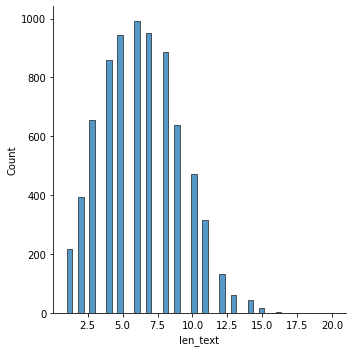

In [52]:
#Let's check the distribution of the len_text column

import seaborn as sns

sns.displot(train_df.len_text)

In [53]:
max_len=15

In [54]:
#Not all the sequences have the same lenght, so we should add a padding process 

tweets_encoded=tf.keras.preprocessing.sequence.pad_sequences(train_df.text_encoded,padding="post",maxlen=max_len) 

In [55]:
#Let's convert our data in tensor flow slices

tensor_df=tf.data.Dataset.from_tensor_slices((tweets_encoded,train_df.target))

In [56]:
#Let's split the data in train and validation tf slices 

to_take=int(tweets_encoded.shape[0]*0.7)

train=tensor_df.take(to_take).shuffle(to_take).batch(32)

val=tensor_df.skip(to_take).batch(32)

In [57]:
#Let's check a batch

next(iter(train))

(<tf.Tensor: shape=(32, 15), dtype=int32, numpy=
 array([[  50,  184,  307,  212, 3503,  193,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [1720,  824, 8295,   34,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [1720, 1319,  363,  132, 8008, 8009,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [  88,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [  11,  853, 1070, 8369,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [9718, 1069, 4261, 9719,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [ 359,  539, 1581, 1450,  611, 1415, 6933, 2166,    0,    0,    0,
            0,    0,    0,    0],
        [3950, 2851,  864,  433,  766,   29,   87, 1026,  322,    0,    0,
            0,    0,    0,    0],
        [  42,  627, 1174,  370,   50,  124,    0,    0,    0,    0,    0,
    

In [76]:
#Let's check if the data frame is not imbalanced

c = Counter(train_df.target)
c

Counter({0: 4316, 1: 3266})

### Now we can create a LSTM Model




In [87]:
from tensorflow.keras.layers import Embedding,Dense,LSTM #SimpleRNN,GRU,


model_lstm = tf.keras.Sequential([
                  Embedding(max_words, 32, input_length=max_len,name="embedding"),# maxleng and inputlength taille du vecteur
                  tf.keras.layers.Bidirectional(LSTM(units=32, return_sequences=True)), # maintains the sequential nature
                  tf.keras.layers.Bidirectional(LSTM(units=32, return_sequences=False)), # returns the last output
                  Dense(32, activation='relu'),
                  tf.keras.layers.Dropout(0.5),
                  Dense(16, activation='relu'),
                  tf.keras.layers.Dropout(0.5),
                  Dense(1, activation="sigmoid", name="last")
])

In [88]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            320000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 15, 64)           16640     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)               

In [92]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
#optimizer= tf.keras.optimizers.Adam()

model_lstm.compile(optimizer='rmsprop',
              loss=BinaryCrossentropy(),
              metrics=["Accuracy"])

In [90]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "Training/cp-{epoch:04d}.ckpt" # the path where checkpoint files

# Create a callback that saves the model's weights every epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=1*len(train))



In [91]:
model_lstm.fit(train,
          epochs=10, 
          validation_data=val,callbacks=[cp_callback])
      

Epoch 1/10
165/166 [============================>.] - ETA: 0s - loss: 0.6476 - binary_accuracy: 0.6036
Epoch 1: saving model to Training/cp-0001.ckpt
166/166 [==============================] - 21s 61ms/step - loss: 0.6468 - binary_accuracy: 0.6045 - val_loss: 0.6193 - val_binary_accuracy: 0.7156
Epoch 2/10
164/166 [============================>.] - ETA: 0s - loss: 0.4860 - binary_accuracy: 0.7923
Epoch 2: saving model to Training/cp-0002.ckpt
166/166 [==============================] - 5s 30ms/step - loss: 0.4866 - binary_accuracy: 0.7925 - val_loss: 0.5182 - val_binary_accuracy: 0.7503
Epoch 3/10
165/166 [============================>.] - ETA: 0s - loss: 0.4182 - binary_accuracy: 0.8407
Epoch 3: saving model to Training/cp-0003.ckpt
166/166 [==============================] - 9s 55ms/step - loss: 0.4184 - binary_accuracy: 0.8408 - val_loss: 0.5158 - val_binary_accuracy: 0.7521
Epoch 4/10
164/166 [============================>.] - ETA: 0s - loss: 0.3720 - binary_accuracy: 0.8620
Epoch 4:

### Now we can create a GRU Model just to test


In [105]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "Training_GRU/cp-{epoch:04d}.ckpt" # the path where checkpoint files

# Create a callback that saves the model's weights every epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=1*len(train))


In [106]:
from tensorflow.keras.layers import GRU

vocab_size = len(tokenizer.word_index)
model_gru = tf.keras.Sequential([
                  Embedding(max_words, 32, input_length=max_len,name="embedding"),
                  GRU(units=32, return_sequences=True), # maintains the sequential nature
                  GRU(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid", name="last")
])

In [107]:
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            320000    
                                                                 
 gru_4 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_5 (GRU)                 (None, 32)                6336      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 last (Dense)                (None, 1)                 9         
                                                                 
Total params: 333,345
Trainable params: 333,345
Non-tr

In [109]:
model_gru.compile(optimizer="rmsprop",
              loss=BinaryCrossentropy(),
              metrics=["Accuracy"]) 

In [110]:
model_gru.fit(train,
          epochs=10, 
          validation_data=val,
          callbacks=[cp_callback])

Epoch 1/10
164/166 [============================>.] - ETA: 0s - loss: 0.6423 - Accuracy: 0.6155
Epoch 1: saving model to Training_GRU/cp-0001.ckpt
166/166 [==============================] - 9s 27ms/step - loss: 0.6407 - Accuracy: 0.6171 - val_loss: 0.5294 - val_Accuracy: 0.7582
Epoch 2/10
163/166 [============================>.] - ETA: 0s - loss: 0.4100 - Accuracy: 0.8246
Epoch 2: saving model to Training_GRU/cp-0002.ckpt
166/166 [==============================] - 4s 22ms/step - loss: 0.4107 - Accuracy: 0.8240 - val_loss: 0.5103 - val_Accuracy: 0.7635
Epoch 3/10
164/166 [============================>.] - ETA: 0s - loss: 0.3509 - Accuracy: 0.8580
Epoch 3: saving model to Training_GRU/cp-0003.ckpt
166/166 [==============================] - 4s 23ms/step - loss: 0.3500 - Accuracy: 0.8583 - val_loss: 0.5589 - val_Accuracy: 0.7644
Epoch 4/10
163/166 [============================>.] - ETA: 0s - loss: 0.3126 - Accuracy: 0.8763
Epoch 4: saving model to Training_GRU/cp-0004.ckpt
166/166 [=======

### Now we can create a RNN Model


In [111]:
from tensorflow.keras.layers import SimpleRNN

vocab_size = len(tokenizer.word_index)
model_RNN = tf.keras.Sequential([
                  Embedding(max_words, 32, input_length=max_len,name="embedding"),# maxleng and inputlength taille du vecteur
                  SimpleRNN(units=32, return_sequences=True), # maintains the sequential nature
                  SimpleRNN(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid", name="last")
])

In [112]:
model_RNN.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 15, 32)            2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 last (Dense)                (None, 1)                 9         
                                                                 
Total params: 324,833
Trainable params: 324,833
Non-tr

In [114]:
model_RNN.compile(optimizer="rmsprop",
              loss=BinaryCrossentropy(),
              metrics=["Accuracy"]) 

In [115]:
model_RNN.fit(train,
          epochs=10, 
          validation_data=val,
          )

Epoch 1/10
166/166 [==============================] - 5s 14ms/step - loss: 0.5927 - Accuracy: 0.6797 - val_loss: 0.5771 - val_Accuracy: 0.7073
Epoch 2/10
166/166 [==============================] - 4s 22ms/step - loss: 0.3800 - Accuracy: 0.8434 - val_loss: 0.5615 - val_Accuracy: 0.7319
Epoch 3/10
166/166 [==============================] - 2s 11ms/step - loss: 0.2634 - Accuracy: 0.9030 - val_loss: 0.6397 - val_Accuracy: 0.7196
Epoch 4/10
166/166 [==============================] - 2s 13ms/step - loss: 0.1929 - Accuracy: 0.9322 - val_loss: 0.6776 - val_Accuracy: 0.6818
Epoch 5/10
166/166 [==============================] - 2s 11ms/step - loss: 0.1497 - Accuracy: 0.9512 - val_loss: 0.7416 - val_Accuracy: 0.7064
Epoch 6/10
166/166 [==============================] - 2s 11ms/step - loss: 0.1214 - Accuracy: 0.9616 - val_loss: 0.8258 - val_Accuracy: 0.6470
Epoch 7/10
166/166 [==============================] - 2s 11ms/step - loss: 0.1034 - Accuracy: 0.9678 - val_loss: 0.8580 - val_Accuracy: 0.6615

### Let's predict

In [118]:
# To load a checkpoint 
model_lstm.load_weights("Training/cp-0006.ckpt")


In [ ]:
test_df

In [120]:
#We can make some NLP transformations

test_df["tweet_format_clean"]=test_df["text"].str.replace(r"[^A-Za-z]+", " ", regex=True) 
test_df["tweet_format_clean"]=test_df["tweet_format_clean"].replace('\s+', ' ', regex=True)
test_df["tweet_format_clean"] = test_df["tweet_format_clean"].fillna('').apply(lambda x: x.lower())

test_df.head()

,id,keyword,location,text,tweet_format_clean
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan


In [121]:
# Now we can drop the useless columns 

test_df=test_df.drop(['id','keyword','location','text'], axis = 1)
test_df.head()

,tweet_format_clean
0,just happened a terrible car crash
1,heard about earthquake is different cities sta...
2,there is a forest fire at spot pond geese are ...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills in china and taiwan


In [122]:
#Let's tokenize the tweets 

import en_core_web_sm
nlp = en_core_web_sm.load()

tokenized_doc_test = test_df['tweet_format_clean'].apply(lambda x: nlp(x))

In [124]:
#Let's remove the stop words and the words with less of two letters

from spacy.lang.en.stop_words import STOP_WORDS
words_to_remove_list=["http","https","co","like"]
all_stopwords=STOP_WORDS
all_stopwords.update(words_to_remove_list)

# remove stop-words and lemmalize 
tokenized_doc_test = tokenized_doc_test.apply(lambda x: [token.lemma_ for token in x if token.text not in all_stopwords and (len(token.text) > 3)])

In [125]:
test_df["tweet_format_token"]=tokenized_doc_test

In [126]:
# This step will effectively transform the texts into sequences of indices
test_df["text_encoded"] = tokenizer.texts_to_sequences(test_df.tweet_format_clean)

In [127]:
test_df

,tweet_format_clean,tweet_format_token,text_encoded
0,just happened a terrible car crash,"[happen, terrible, crash]","[1374, 549, 10]"
1,heard about earthquake is different cities sta...,"[hear, earthquake, different, city, stay, safe]","[151, 851, 315, 897, 6200]"
2,there is a forest fire at spot pond geese are ...,"[forest, fire, spot, pond, geese, flee, street...","[99, 1, 470, 2501, 355, 75]"
3,apocalypse lighting spokane wildfires,"[apocalypse, light, spokane, wildfire]","[295, 3855, 5414]"
4,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kill, china, taiwan]","[130, 455, 212, 856]"
...,...,...,...
3258,earthquake safety los angeles safety fasteners...,"[earthquake, safety, angeles, safety, fastener...","[151, 777, 2079, 777]"
3259,storm in ri worse than last hurricane my city ...,"[storm, bad, hurricane, city, hardest, yard, l...","[27, 2289, 185, 94, 6731, 1001, 6732, 184, 300]"
3260,green line derailment in chicago http t co utb...,"[green, line, derailment, chicago, utbxlcbiuy]","[617, 390, 233, 576]"
3261,meg issues hazardous weather outlook hwo http ...,"[issue, hazardous, weather, outlook, rbqjhn]","[275, 158, 1219]"


In [134]:
#Not all the sequences have the same lenght, so we should add a padding process 

tweets_encoded_test=tf.keras.preprocessing.sequence.pad_sequences(test_df.text_encoded,padding="post",maxlen=max_len) 

In [138]:
predictions = model_lstm.predict(tweets_encoded_test)
print(predictions)


[[0.35566735]
 [0.9530157 ]
 [0.8901434 ]
 ...
 [0.992362  ]
 [0.820655  ]
 [0.9533769 ]]


In [142]:
test_df["predictions"]=predictions

In [143]:
test_df

,tweet_format_clean,tweet_format_token,text_encoded,predictions
0,just happened a terrible car crash,"[happen, terrible, crash]","[1374, 549, 10]",0.355667
1,heard about earthquake is different cities sta...,"[hear, earthquake, different, city, stay, safe]","[151, 851, 315, 897, 6200]",0.953016
2,there is a forest fire at spot pond geese are ...,"[forest, fire, spot, pond, geese, flee, street...","[99, 1, 470, 2501, 355, 75]",0.890143
3,apocalypse lighting spokane wildfires,"[apocalypse, light, spokane, wildfire]","[295, 3855, 5414]",0.293177
4,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kill, china, taiwan]","[130, 455, 212, 856]",0.994238
...,...,...,...,...
3258,earthquake safety los angeles safety fasteners...,"[earthquake, safety, angeles, safety, fastener...","[151, 777, 2079, 777]",0.928304
3259,storm in ri worse than last hurricane my city ...,"[storm, bad, hurricane, city, hardest, yard, l...","[27, 2289, 185, 94, 6731, 1001, 6732, 184, 300]",0.988267
3260,green line derailment in chicago http t co utb...,"[green, line, derailment, chicago, utbxlcbiuy]","[617, 390, 233, 576]",0.992362
3261,meg issues hazardous weather outlook hwo http ...,"[issue, hazardous, weather, outlook, rbqjhn]","[275, 158, 1219]",0.820655


In [146]:
test_df.to_excel("/content/Predictions_Disaster_Tweets_V1.xlsx")